In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [2]:
data = pd.read_csv('Catalogues/NGC5822_10_Pop1.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,...,BPmag-RPmag,min,max,std,avg,mode,median,Q1,Q3,excl
0,226.278252,-54.697365,5887624800961510400,1.2462,-7.439,-5.809,31,1.439,NaN,0.950,...,1.385866,0.007790,0.702362,0.151530,0.654662,0.70,0.702362,7.023624e-01,0.702362,0.095412
1,226.310236,-54.677215,5887624942748546176,1.1561,-7.421,-5.689,31,1.523,NaN,0.965,...,0.970911,0.088511,0.717542,0.104143,0.619417,0.70,0.648424,5.645897e-01,0.717542,0.450236
2,226.249485,-54.671130,5887625080187337088,1.1929,-7.145,-5.580,31,1.524,NaN,1.054,...,0.962914,0.000000,0.744165,0.208364,0.108840,0.00,0.000030,1.889621e-18,0.115804,0.929736
3,226.300819,-54.674653,5887625148906977664,1.2617,-7.338,-5.682,31,1.420,NaN,1.107,...,1.485166,0.057544,0.723952,0.178365,0.568233,0.72,0.617985,4.390195e-01,0.723952,0.295382
4,226.275531,-54.649934,5887625217626464128,1.1889,-7.597,-5.737,31,1.515,NaN,1.029,...,0.999108,0.019891,0.762507,0.170418,0.647922,0.76,0.762507,5.755116e-01,0.762507,0.379363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,226.176026,-54.116422,5887726471427113856,1.1859,-7.441,-5.464,31,1.600,NaN,1.001,...,0.632827,0.091296,0.828737,0.098256,0.755186,0.82,0.786998,7.241897e-01,0.828737,0.082609
285,226.132637,-54.081687,5887726815024494464,1.2112,-7.567,-5.556,31,1.600,NaN,1.003,...,0.622432,0.166278,0.793846,0.109723,0.649469,0.70,0.677649,5.991653e-01,0.730100,0.678555
286,226.196630,-54.040343,5887727364780305792,1.1708,-7.596,-5.351,31,1.627,NaN,0.931,...,0.512227,0.319316,0.729975,0.050423,0.707430,0.72,0.729975,7.075076e-01,0.729975,0.117055
287,226.235942,-54.028322,5887727437849949184,1.1716,-7.410,-5.400,31,1.544,NaN,0.997,...,0.878441,0.002366,0.705214,0.125350,0.592612,0.70,0.630348,5.548896e-01,0.680926,0.425392


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


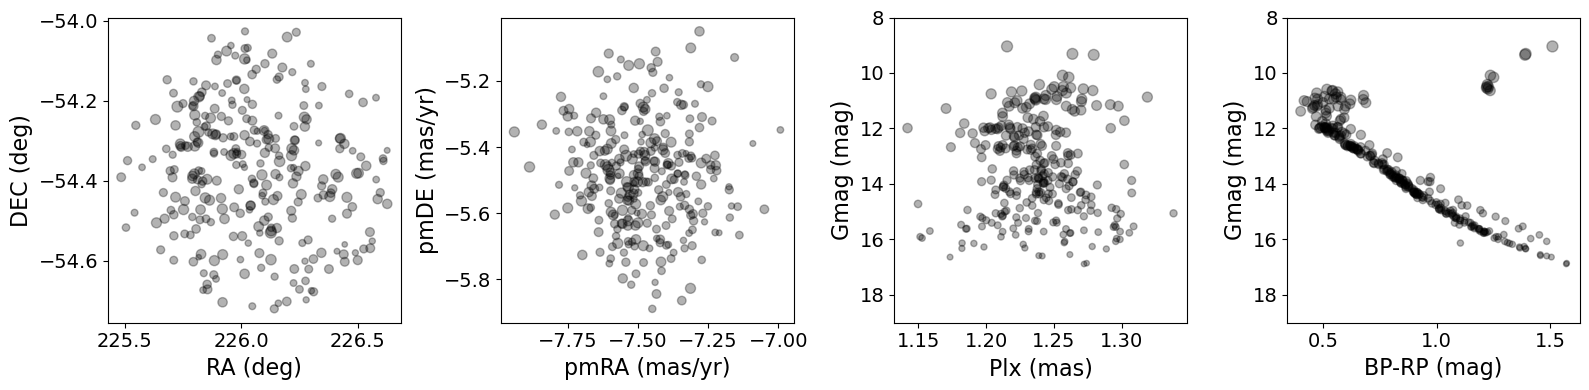

In [3]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [4]:
population = data

## First Analysis

### RA,DEC

In [5]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data,"RAJ2000","DEJ2000",20,0)

In [6]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 226.0210
DEC = -54.3709


Text(0, 0.5, 'DEC (deg)')

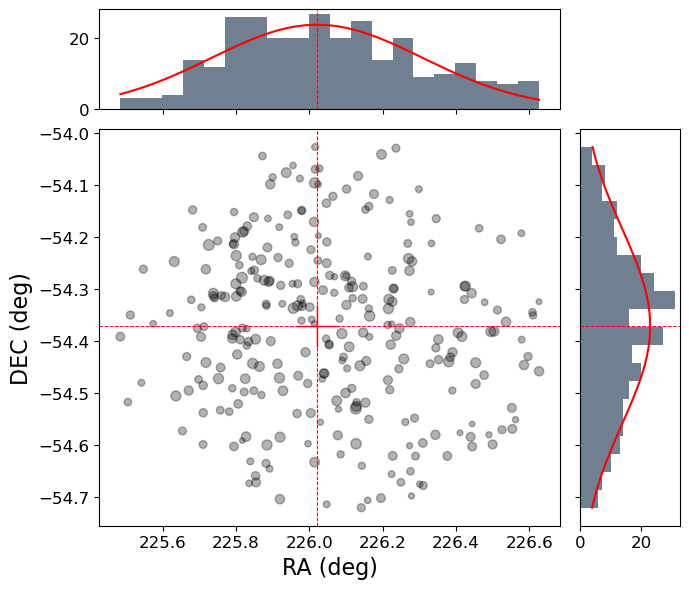

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [8]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data,"pmRA","pmDE",20,0)

In [9]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -7.4856
pmDE = -5.4874


Text(0, 0.5, 'pmde (mas/yr)')

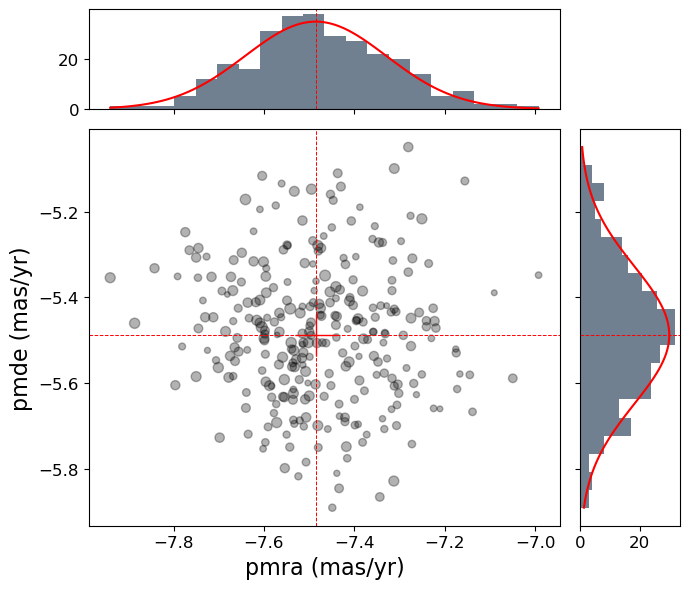

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [11]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data,"Plx_corr",20,0)

In [12]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 1.2372


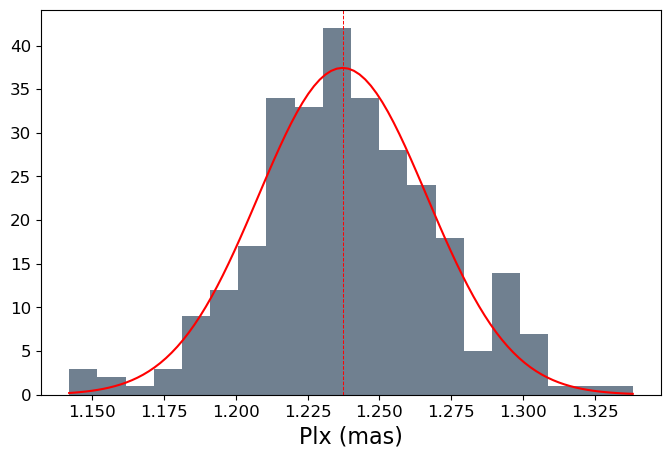

In [13]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)

## Second Analysis

In [14]:
pmra_cluster = params_pmra[1]
pmde_cluster = params_pmde[1]

sigma_ra = np.sqrt(params_ra[2])
sigma_de = np.sqrt(params_de[2])
sigma_pmra = np.sqrt(params_pmra[2])
sigma_pmde = np.sqrt(params_pmde[2])
sigma_plx = np.sqrt(params_plx[2])

In [15]:
data2 = movprop_stat_filter(data,pmra_cluster,pmde_cluster,sigma_pmra,sigma_pmde, 3, "vizier")

In [16]:
population=data2

### RA, DEC

In [17]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data2,"RAJ2000","DEJ2000",20,0)

In [18]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 226.0104
DEC = -54.3685


Text(0, 0.5, 'DEC (deg)')

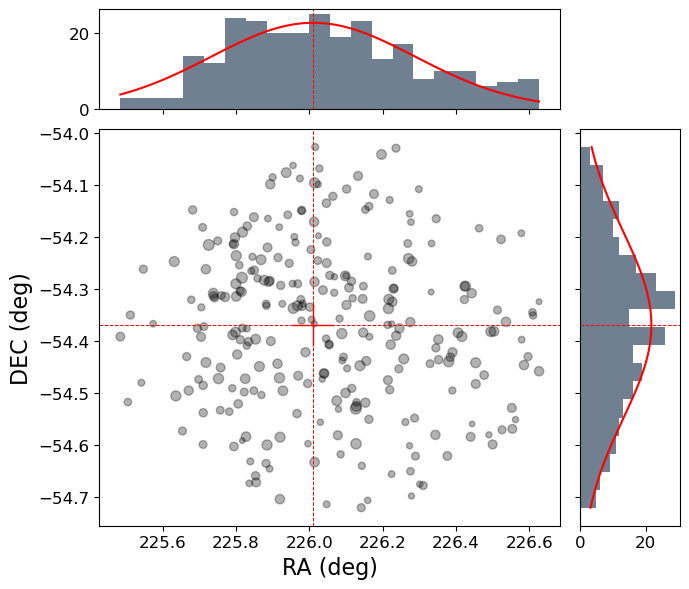

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [20]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data2,"pmRA","pmDE",20,0)

In [21]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -7.4892
pmDE = -5.4906


Text(0, 0.5, 'pmde (mas/yr)')

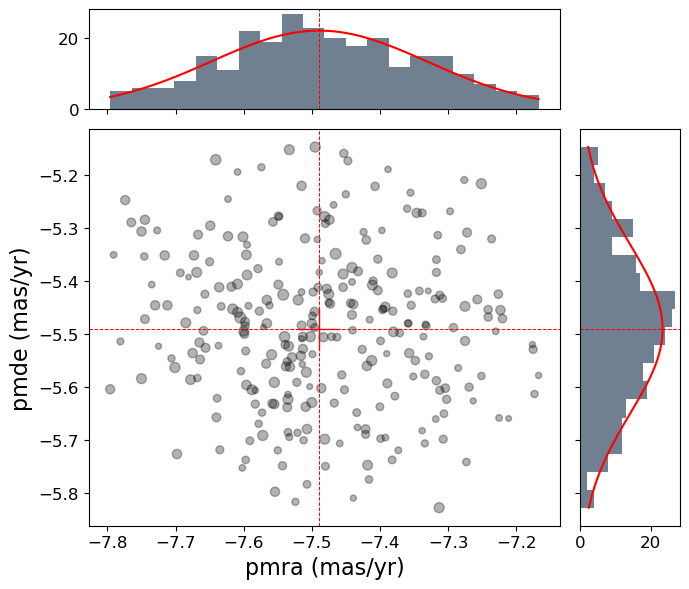

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [23]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data2,"Plx_corr",20,0)

In [24]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 1.2369


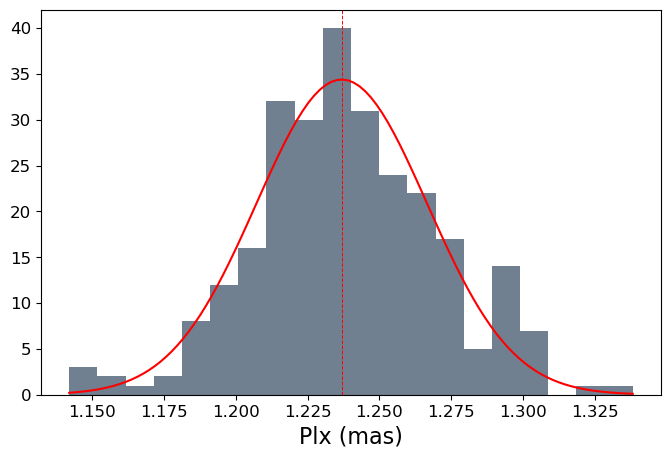

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)